In [3]:
import imageio
import os
from visualize import visualize
from trapezoidal import rk_integrator
import numpy as np
import matplotlib.pyplot as plt
import natsort

In [2]:
def plot_results(x, L_list, tlist):
    n_t = x[:,2:]
    plt.pcolormesh(tlist, L_list, n_t.T, shading='nearest')
    plt.ylabel('L (particle size)')
    plt.xlabel('time')
    plt.colorbar()
    plt.show()

    plt.plot(tlist, x[:,0]) 
    plt.title('supersaturation')
    plt.xlabel('t')
    plt.show()

    plt.plot(tlist, x[:,1]) 
    plt.title('volume')
    plt.xlabel('t')

def better_imshow(row_vals, col_vals, data, ax=None):
    #row_vals and col_vals are the data that was swept over
    assert len(row_vals) == data.shape[0], 'length of row_vals does not match shape of data'
    assert len(col_vals) == data.shape[1], 'length of col_vals does not match shape of data'
    if ax == None:
        plt.imshow(data, origin='lower', extent=[col_vals[0], col_vals[-1], row_vals[0], row_vals[-1]], aspect='auto')
    else:
        ax.imshow(data, origin='lower', extent=[col_vals[0], col_vals[-1], row_vals[0], row_vals[-1]], aspect='auto')
      

  0%|          | 0/100000 [00:00<?, ?it/s]

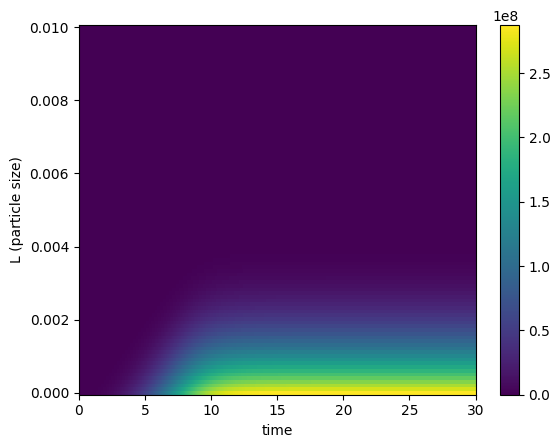

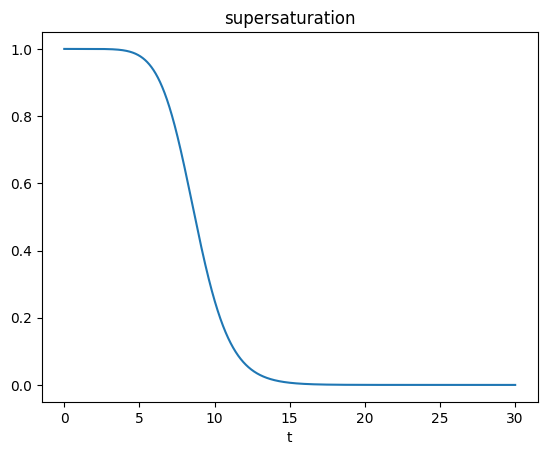

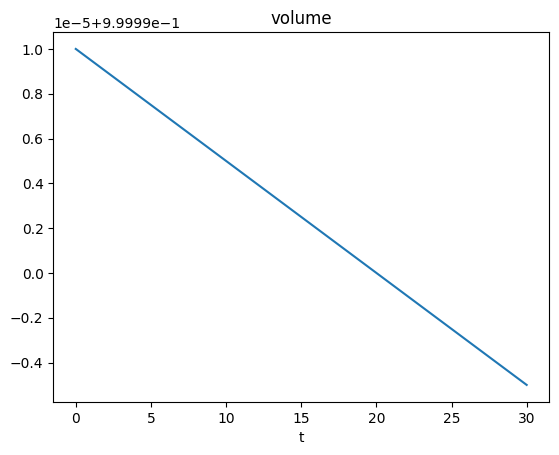

In [3]:
#rk4
L_list = np.linspace(0,1e-2, 100)  # uniform dL assumed below
tlist = np.linspace(0,30,100000)


S0 = 1 #initial supersaturation
V0 = 1 #initial volume
n0 = np.zeros_like(L_list) #initial population density distribution
x0 = np.hstack([S0, V0, n0])

# target parameters we will try to recover
p = {
    'L_list' : L_list,
    'E' :  1e-6, #evaporation rate
    'rho' : 1200, # density of the crystal
    'k_v' : 1, #goes in N_C, volumetric shape factor
    'k_g' : 1e-3, #growth rate constant m/s
    'g' : 1, #power constant for growth
    'k_N' : 1e5, #nucleation rate constant 
    'alpha' :2, #power constant for nucleation
    'weno': False  # use weno or not for differentiation w.r.t. L
     }
x_t = rk_integrator(x0, tlist, p)
plot_results(x_t, L_list, tlist)

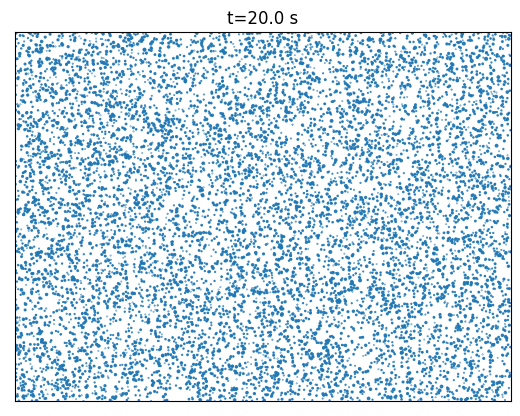

In [4]:
n_t = x_t[:,2:]
t_ind = 66660
plot = visualize(n_t,L_list,t_ind, tlist, num_scale = 10000, dot_scale=1000, alpha=0.9)

In [5]:
output_folder = r"C:\Users\ChemeGrad2021\Dropbox (MIT)\Graduate\Third Year\6.7300\Images"
t_ind_list = np.linspace(0, 66660, 500)
n_t = x_t[:,2:]
for idx in t_ind_list:
    # Call plotting function
    t_ind = int(idx)
    plot = visualize(n_t,L_list,t_ind, tlist, num_scale = 100000, dot_scale=2000, alpha=0.9)

    # Save the plot to the output folder
    plot_filename = f'plot_{t_ind}.png'
    plot_path = os.path.join(output_folder, plot_filename)
    plot.savefig(plot_path)
    # Close the plot to free up resources

c:\Users\ChemeGrad2021\crystalPBM\functions\visualize.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


In [17]:
output_folder = r"C:\Users\ChemeGrad2021\Dropbox (MIT)\Graduate\Third Year\6.7300\Images"
gif_name = r"C:\Users\ChemeGrad2021\Dropbox (MIT)\Graduate\Third Year\6.7300\Images\visualization.gif"
kargs = { 'duration': 2 }
files = os.listdir(output_folder)
sorted_files = sorted(files, key=lambda x: int(x.split('_')[1].split('.')[0]) if x.startswith('plot_') else float('inf'))
sorted_files2 = sorted_files[0:251]
images = []
for filename in sorted_files2:
    if filename.endswith('.png'):
        file_path = os.path.join(output_folder, filename)
        images.append(imageio.imread(file_path))
for _ in range(10):
    images.append(imageio.imread(file_path))
imageio.mimsave(gif_name, images, 'gif', **kargs)

C:\Users\ChemeGrad2021\AppData\Local\Temp\ipykernel_84596\61592452.py:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(file_path))
C:\Users\ChemeGrad2021\AppData\Local\Temp\ipykernel_84596\61592452.py:13: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(file_path))
